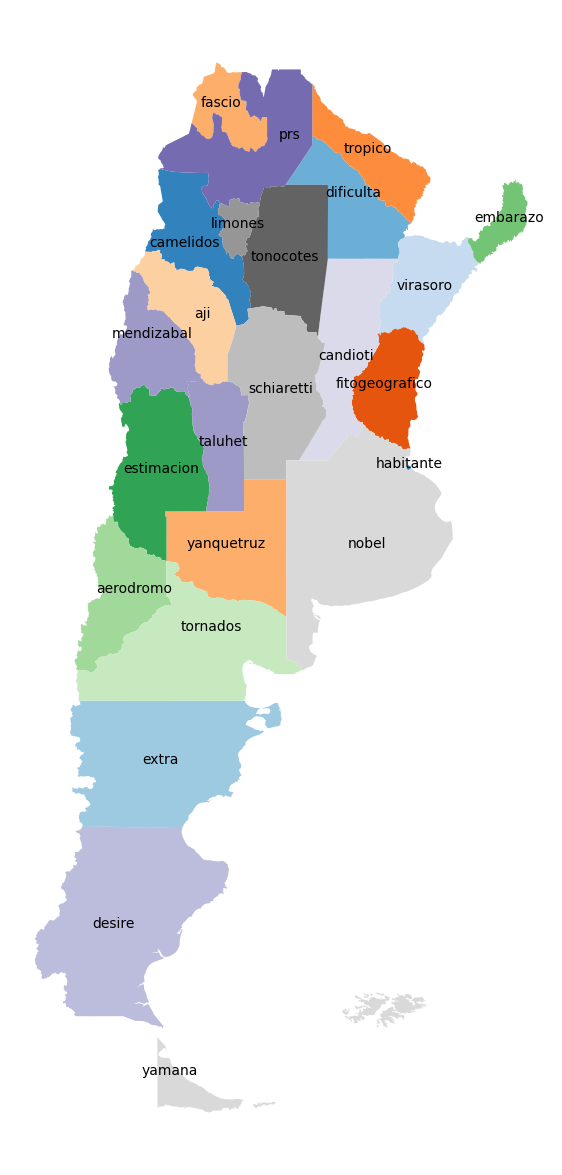

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

words = {'Ciudad Autónoma de Buenos Aires': 'habitante',
 'Provincia de Buenos Aires': 'nobel',
 'Catamarca': 'camelidos',
 'Corrientes': 'virasoro',
 'Córdoba': 'schiaretti',
 'Entre Ríos': 'fitogeografico',
 'Formosa': 'tropico',
 'Jujuy': 'fascio',
 'La Pampa': 'yanquetruz',
 'La Rioja': 'aji',
 'Mendoza': 'estimacion',
 'Misiones': 'embarazo',
 'Río Negro': 'tornados',
 'Salta': 'prs',
 'San Juan': 'mendizabal',
 'San Luis': 'taluhet',
 'Santa Cruz': 'desire',
 'Santa Fe': 'candioti',
 'Santiago del Estero': 'tonocotes',
 'Tierra del Fuego e Islas del Atlántico Sur': 'yamana',
 'Tucumán': 'limones',
 'Chaco': 'dificulta',
 'Chubut': 'extra',
 'Neuquén': 'aerodromo'}

provinces_geo = gpd.read_file('provincias_argentinas_polygon.geojson')

f, ax = plt.subplots(1, figsize=(15, 15))
provinces = provinces_geo.join(pd.DataFrame(pd.Series(words)).rename(columns={0: 'word'}), on='provincia')
provinces['coords'] = provinces['geometry'].apply(lambda x: x.representative_point().coords[:])
provinces['coords'] = [coords[0] for coords in provinces['coords']]
ax = provinces.plot(cmap='tab20c', ax=ax, legend=True)
for idx, row in provinces.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['word'], horizontalalignment='center')
ax.axis('off')
plt.show()